In [20]:
#import dependencies
%matplotlib notebook
import csv
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
#from config import api_key
from citipy import citipy
import random
import json
from pprint import pprint
import time
import gmaps

In [21]:
mort_2010 = pd.read_csv('asthma_mortality_2010.csv')
mort_2010 = mort_2010.rename(columns={'LocationDesc': 'State','DataValue':'2010 Mortality'})
mort_2011 = pd.read_csv('asthma_mortality_2011.csv')
mort_2011 = mort_2011.rename(columns={'LocationDesc': 'State','DataValue':'2011 Mortality'})
mort_2012 = pd.read_csv('asthma_mortality_2012.csv')
mort_2012 = mort_2012.rename(columns={'LocationDesc': 'State','DataValue':'2012 Mortality'})
mort_2013 = pd.read_csv('asthma_mortality_2013.csv')
mort_2013 = mort_2013.rename(columns={'LocationDesc': 'State','DataValue':'2013 Mortality'})
mort_2014 = pd.read_csv('asthma_mortality_2014.csv')
mort_2014 = mort_2014.rename(columns={'LocationDesc': 'State','DataValue':'2014 Mortality'})

In [22]:
hosp_2010 = pd.read_csv('hospitalization_2010.csv')
hosp_2010 = hosp_2010.rename(columns={'LocationDesc': 'State','DataValue':'2010 Hospitalization'})
hosp_2013 = pd.read_csv('hospitalization_2013.csv')
hosp_2013 = hosp_2013.rename(columns={'LocationDesc': 'State','DataValue':'2013 Hospitalization'})
hosp_2014 = pd.read_csv('hospitalization_2014.csv')
hosp_2014 = hosp_2014.rename(columns={'LocationDesc': 'State','DataValue':'2014 Hospitalization'})
hosp_2010.head()

,State,YearStart,LocationAbbr,Question,DataValueUnit,DataValueType,2010 Hospitalization
0,Alabama,2010,AL,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN
1,Alaska,2010,AK,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN
2,Arizona,2010,AZ,Hospitalizations for asthma,"cases per 10,000",Crude Rate,12.59
3,Arkansas,2010,AR,Hospitalizations for asthma,"cases per 10,000",Crude Rate,9.72
4,California,2010,CA,Hospitalizations for asthma,"cases per 10,000",Crude Rate,9.26


In [23]:
aqi_yearly = pd.read_csv('aqi_state_yearly.csv')

In [24]:
aqi_2010_df = aqi_yearly[['Unnamed: 0','2010']]
aqi_2010_df = aqi_2010_df.rename(columns={'Unnamed: 0': 'State','2010':'2010 AQI'})
aqi_2011_df = aqi_yearly[['Unnamed: 0','2011']]
aqi_2011_df = aqi_2011_df.rename(columns={'Unnamed: 0': 'State','2011':'2011 AQI'})
aqi_2012_df = aqi_yearly[['Unnamed: 0','2012']]
aqi_2012_df = aqi_2012_df.rename(columns={'Unnamed: 0': 'State','2012':'2012 AQI'})
aqi_2013_df = aqi_yearly[['Unnamed: 0','2013']]
aqi_2013_df = aqi_2013_df.rename(columns={'Unnamed: 0': 'State','2013':'2013 AQI'})
aqi_2014_df = aqi_yearly[['Unnamed: 0','2014']]
aqi_2014_df = aqi_2014_df.rename(columns={'Unnamed: 0': 'State','2014':'2014 AQI'})

In [25]:
mort_2010.head()

,State,YearStart,LocationAbbr,Question,DataValueUnit,DataValueType,2010 Mortality
0,Alabama,2010,AL,Asthma mortality rate,"cases per 1,000,000",Crude Rate,12.8
1,Alaska,2010,AK,Asthma mortality rate,"cases per 1,000,000",Crude Rate,NaN
2,Arizona,2010,AZ,Asthma mortality rate,"cases per 1,000,000",Crude Rate,9.1
3,Arkansas,2010,AR,Asthma mortality rate,"cases per 1,000,000",Crude Rate,12.7
4,California,2010,CA,Asthma mortality rate,"cases per 1,000,000",Crude Rate,10.8


In [26]:
aqi_2010_df.head()

,State,2010 AQI
0,Alabama,48.870987
1,Alaska,29.809251
2,Arizona,51.889248
3,Arkansas,42.856684
4,California,54.094743


In [27]:
#mort_2010['2010 Mortality'].value_counts()

In [28]:
# Merge two dataframes using a left join
merge_2010 = pd.merge(mort_2010, aqi_2010_df, on="State", how="left")
merge_2011 = pd.merge(mort_2011, aqi_2011_df, on="State", how="left")
merge_2012 = pd.merge(mort_2012, aqi_2012_df, on="State", how="left")
merge_2013 = pd.merge(mort_2013, aqi_2013_df, on="State", how="left")
merge_2014 = pd.merge(mort_2014, aqi_2014_df, on="State", how="left")

merge_h_2010 = pd.merge(hosp_2010, aqi_2010_df, on="State", how="left")
merge_h_2013 = pd.merge(hosp_2013, aqi_2013_df, on="State", how="left")
merge_h_2014 = pd.merge(hosp_2014, aqi_2014_df, on="State", how="left")

merge_h_2010.head()

,State,YearStart,LocationAbbr,Question,DataValueUnit,DataValueType,2010 Hospitalization,2010 AQI
0,Alabama,2010,AL,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,48.870987
1,Alaska,2010,AK,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,29.809251
2,Arizona,2010,AZ,Hospitalizations for asthma,"cases per 10,000",Crude Rate,12.59,51.889248
3,Arkansas,2010,AR,Hospitalizations for asthma,"cases per 10,000",Crude Rate,9.72,42.856684
4,California,2010,CA,Hospitalizations for asthma,"cases per 10,000",Crude Rate,9.26,54.094743


In [41]:
merge_2010 = merge_2010.dropna(how='any')
merge_2010 = merge_2010.sort_values(['2010 AQI'], ascending=[False])
merge_2011 = merge_2011.dropna(how='any')
merge_2011 = merge_2011.sort_values(['2011 AQI'], ascending=[False])
merge_2012 = merge_2012.dropna(how='any')
merge_2012 = merge_2012.sort_values(['2012 AQI'], ascending=[False])
merge_2013 = merge_2013.dropna(how='any')
merge_2013 = merge_2013.sort_values(['2013 AQI'], ascending=[False])
merge_2014 = merge_2014.dropna(how='any')
merge_2014 = merge_2014.sort_values(['2014 AQI'], ascending=[False])

merge_h_2010 = merge_h_2010.dropna(how='any')
merge_h_2010 = merge_h_2010.sort_values(['2010 AQI'], ascending=[False])
merge_h_2013 = merge_h_2013.dropna(how='any')
merge_h_2013 = merge_h_2013.sort_values(['2013 AQI'], ascending=[False])
merge_h_2014 = merge_h_2014.dropna(how='any')
merge_h_2014 = merge_h_2014.sort_values(['2014 AQI'], ascending=[False])

merge_h_2010.head()

,State,YearStart,LocationAbbr,Question,DataValueUnit,DataValueType,2010 Hospitalization,2010 AQI
10,Hawaii,2010,HI,Hospitalizations for asthma,"cases per 10,000",Crude Rate,8.27,80.273066
4,California,2010,CA,Hospitalizations for asthma,"cases per 10,000",Crude Rate,9.26,54.094743
19,Maryland,2010,MD,Hospitalizations for asthma,"cases per 10,000",Crude Rate,16.44,53.360858
2,Arizona,2010,AZ,Hospitalizations for asthma,"cases per 10,000",Crude Rate,12.59,51.889248
43,Utah,2010,UT,Hospitalizations for asthma,"cases per 10,000",Crude Rate,5.46,51.192346


<IPython.core.display.Javascript object>


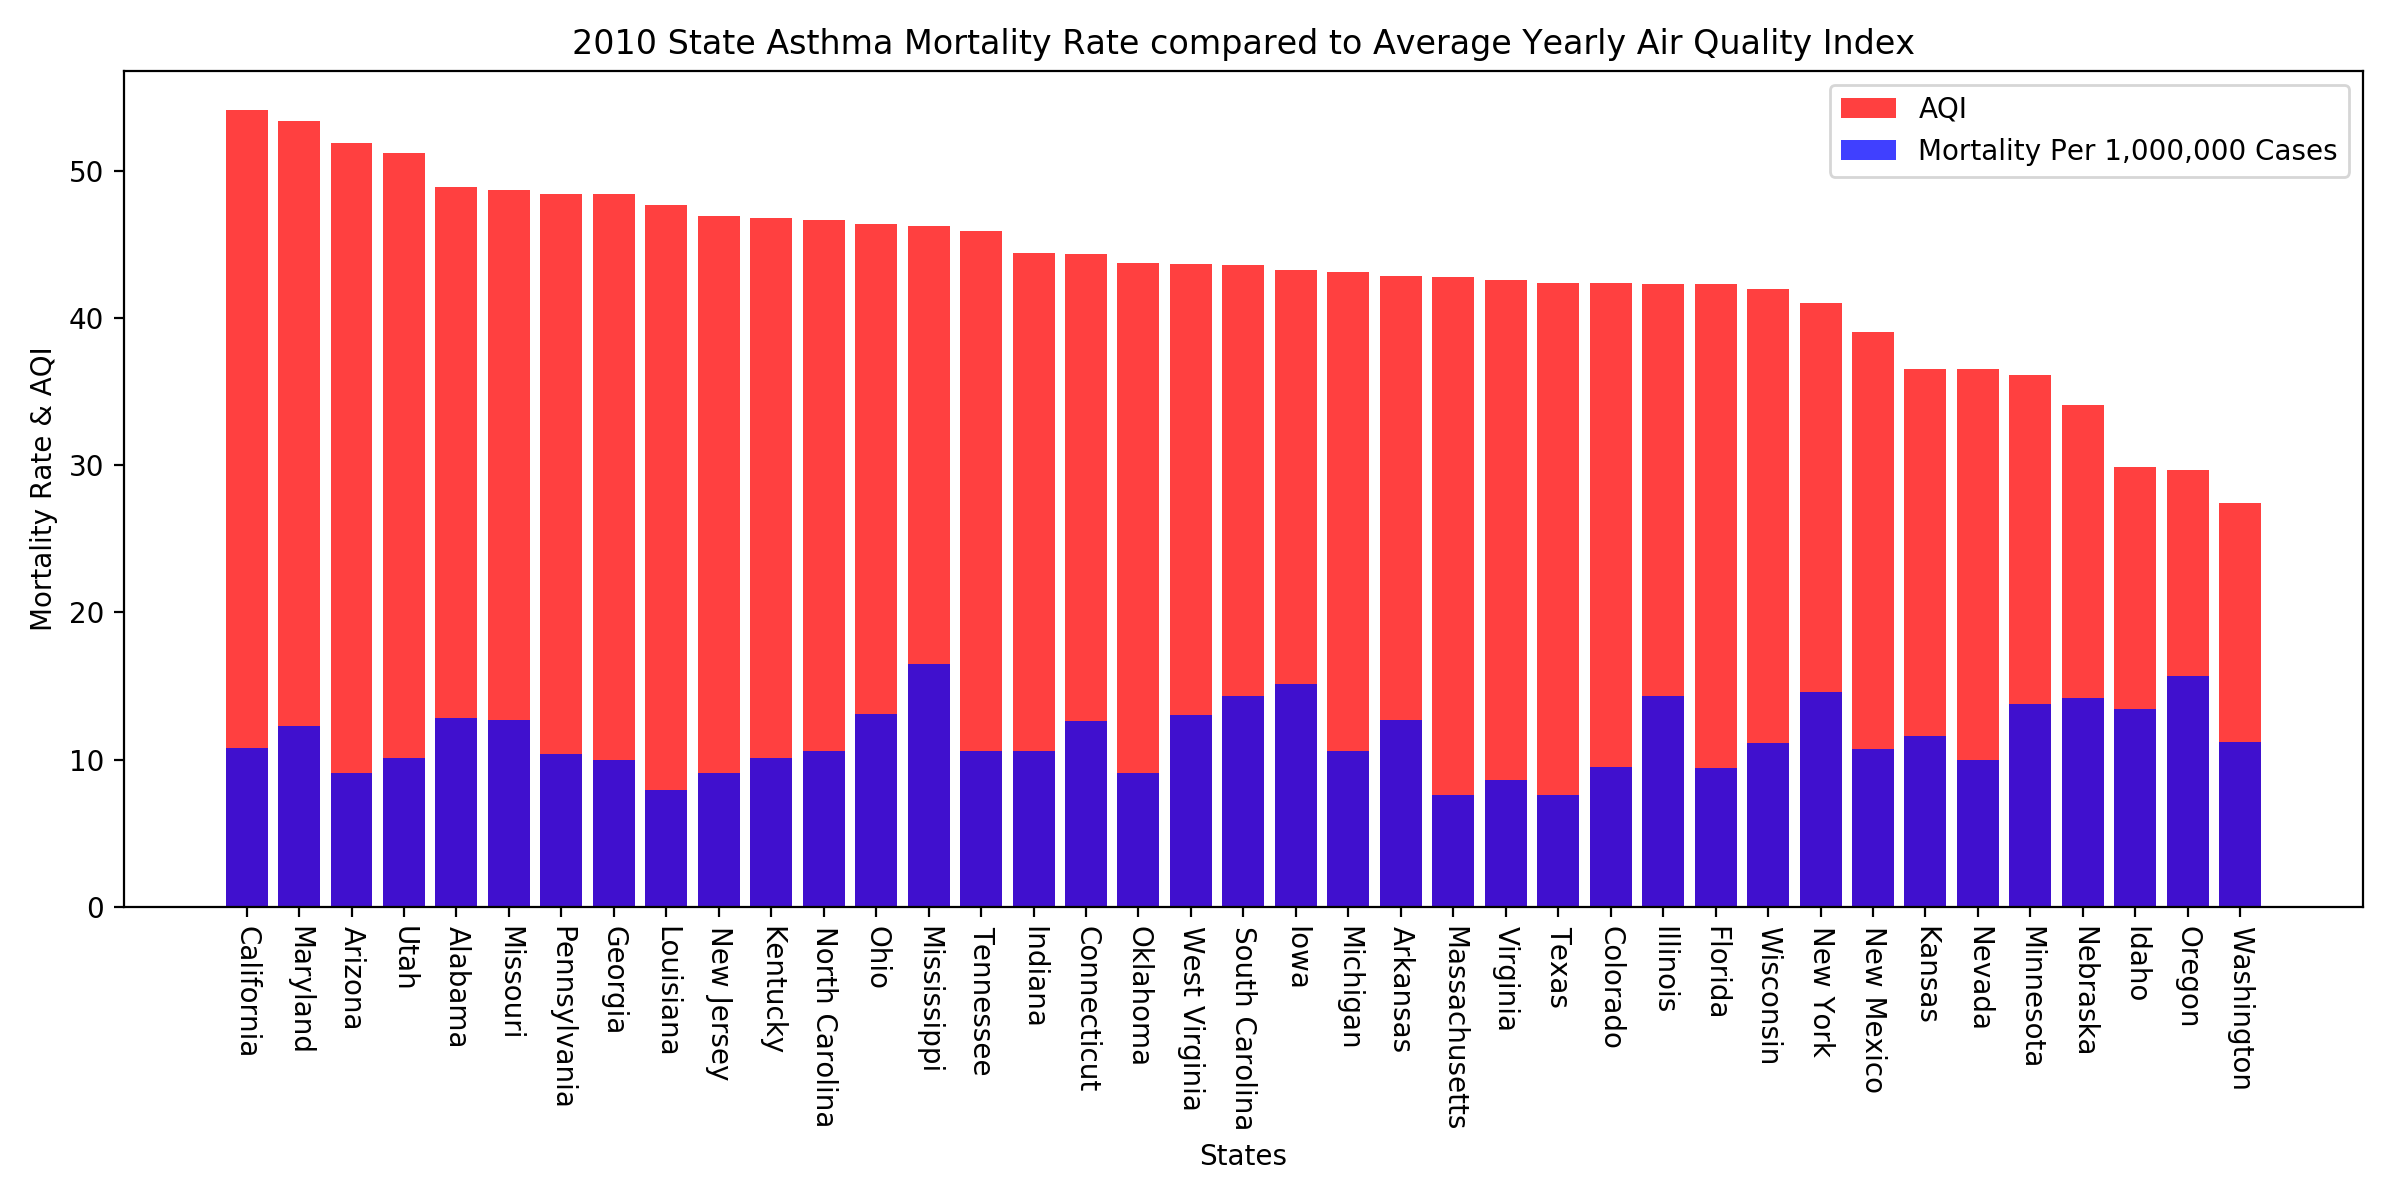

In [42]:
plt.figure(2010,figsize=(12,6))
plt.bar(merge_2010['State'], merge_2010['2010 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_2010['State'], merge_2010['2010 Mortality'], color='b', alpha=0.75, align="center", label="Mortality Per 1,000,000 Cases")
plt.title("2010 State Asthma Mortality Rate compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
#plt.ylim(0,67)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("2010 Plot.png")

<IPython.core.display.Javascript object>


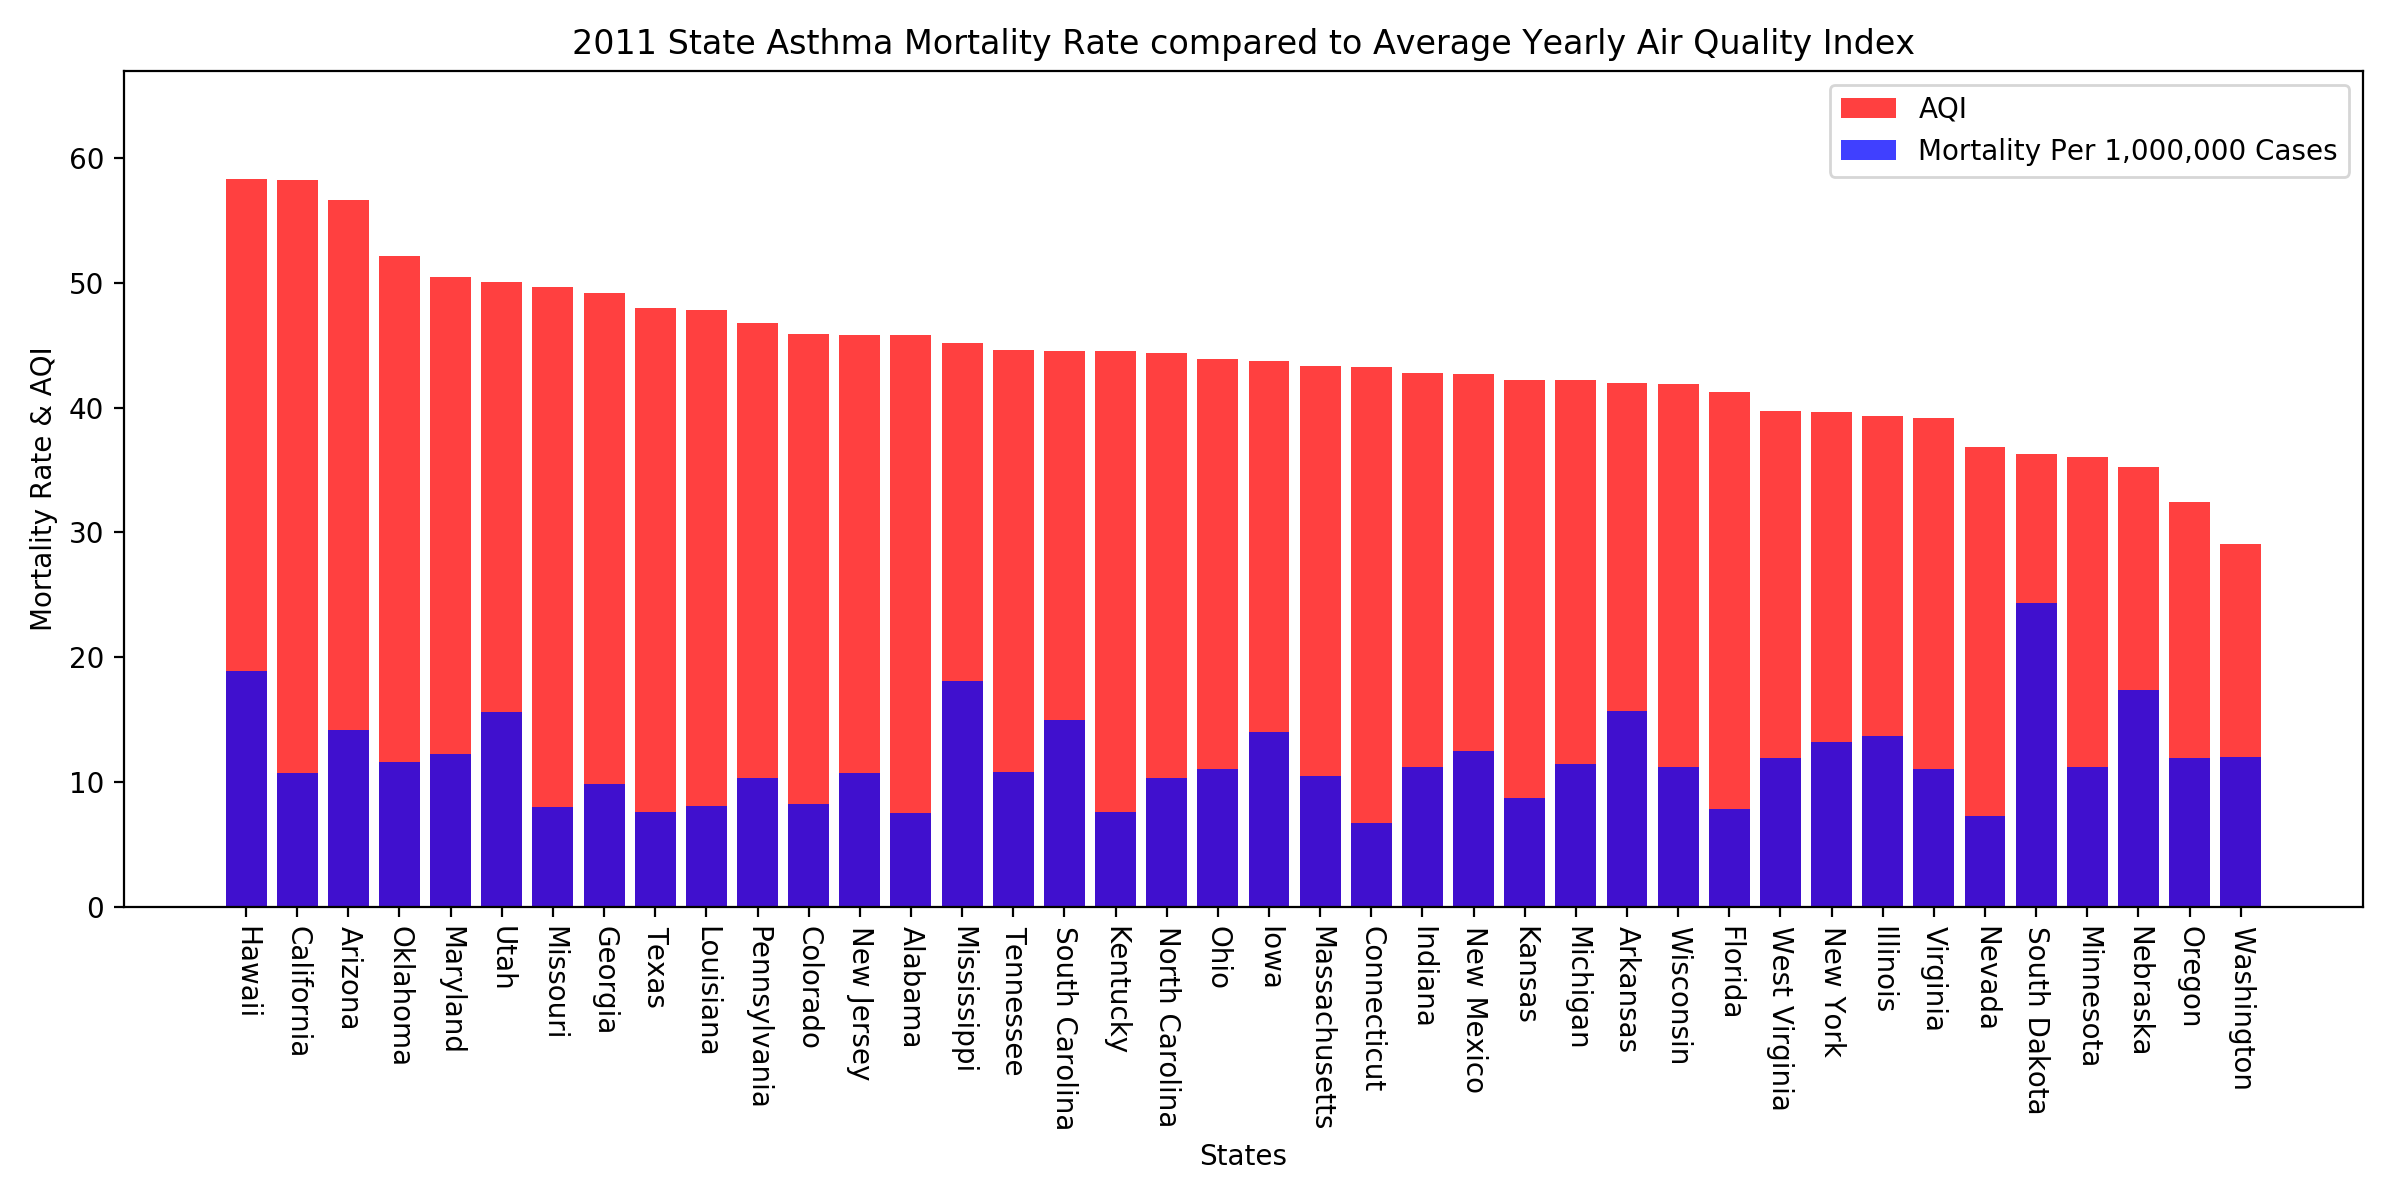

In [43]:
plt.figure(2011,figsize=(12,6))
plt.bar(merge_2011['State'], merge_2011['2011 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_2011['State'], merge_2011['2011 Mortality'], color='b', alpha=0.75, align="center", label="Mortality Per 1,000,000 Cases")
plt.title("2011 State Asthma Mortality Rate compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,67)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("2011 Plot.png")

<IPython.core.display.Javascript object>


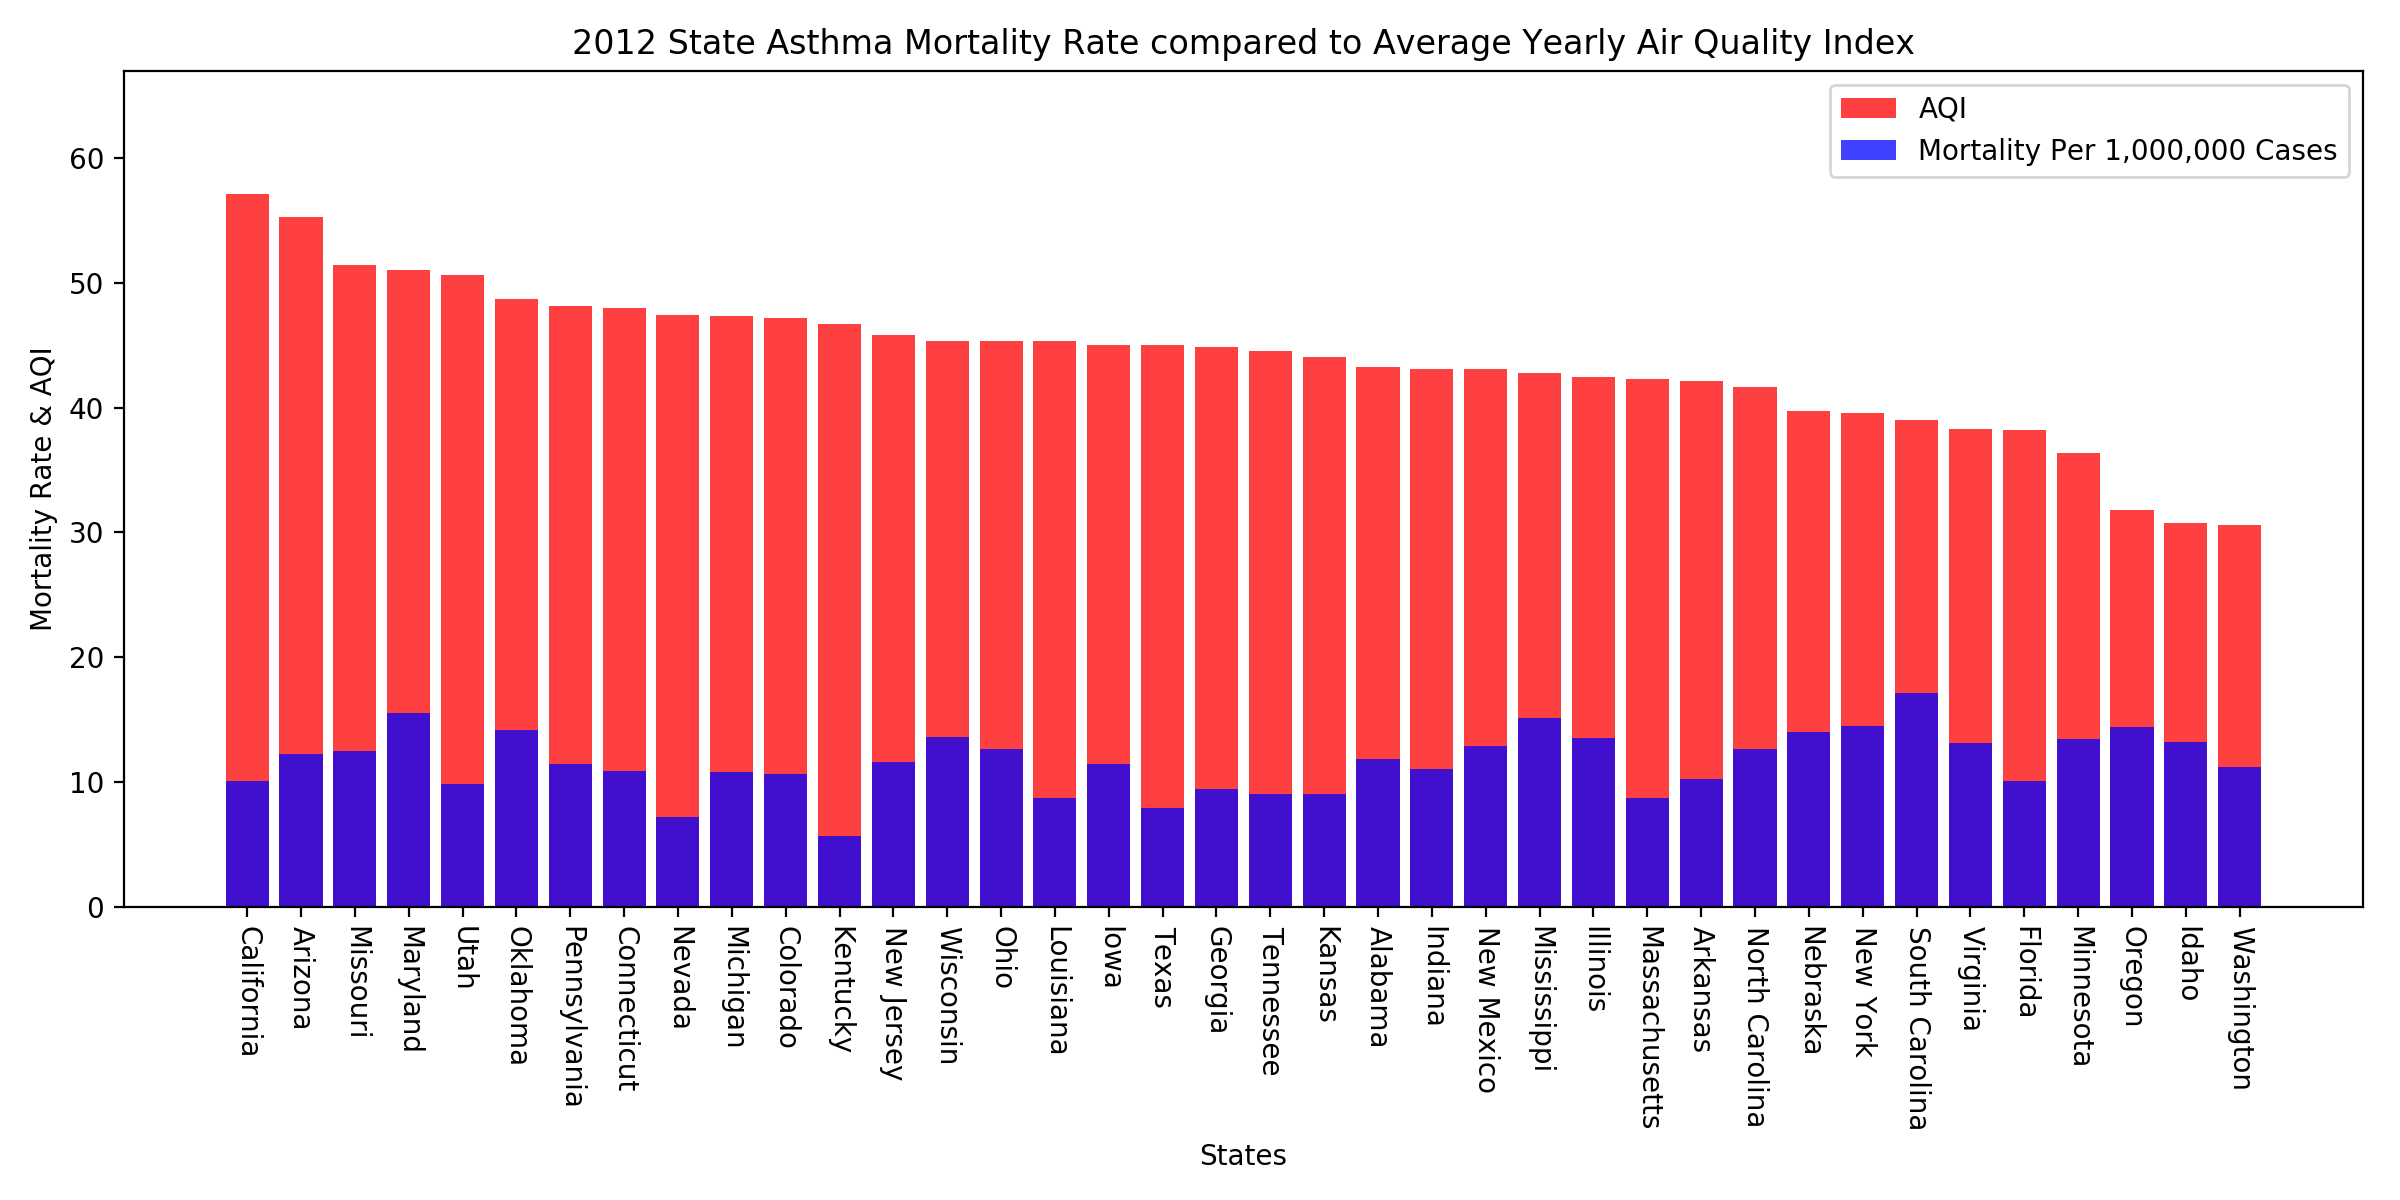

In [44]:
plt.figure(2012,figsize=(12,6))
plt.bar(merge_2012['State'], merge_2012['2012 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_2012['State'], merge_2012['2012 Mortality'], color='b', alpha=0.75, align="center", label="Mortality Per 1,000,000 Cases")
plt.title("2012 State Asthma Mortality Rate compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,67)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("2012 Plot.png")

<IPython.core.display.Javascript object>


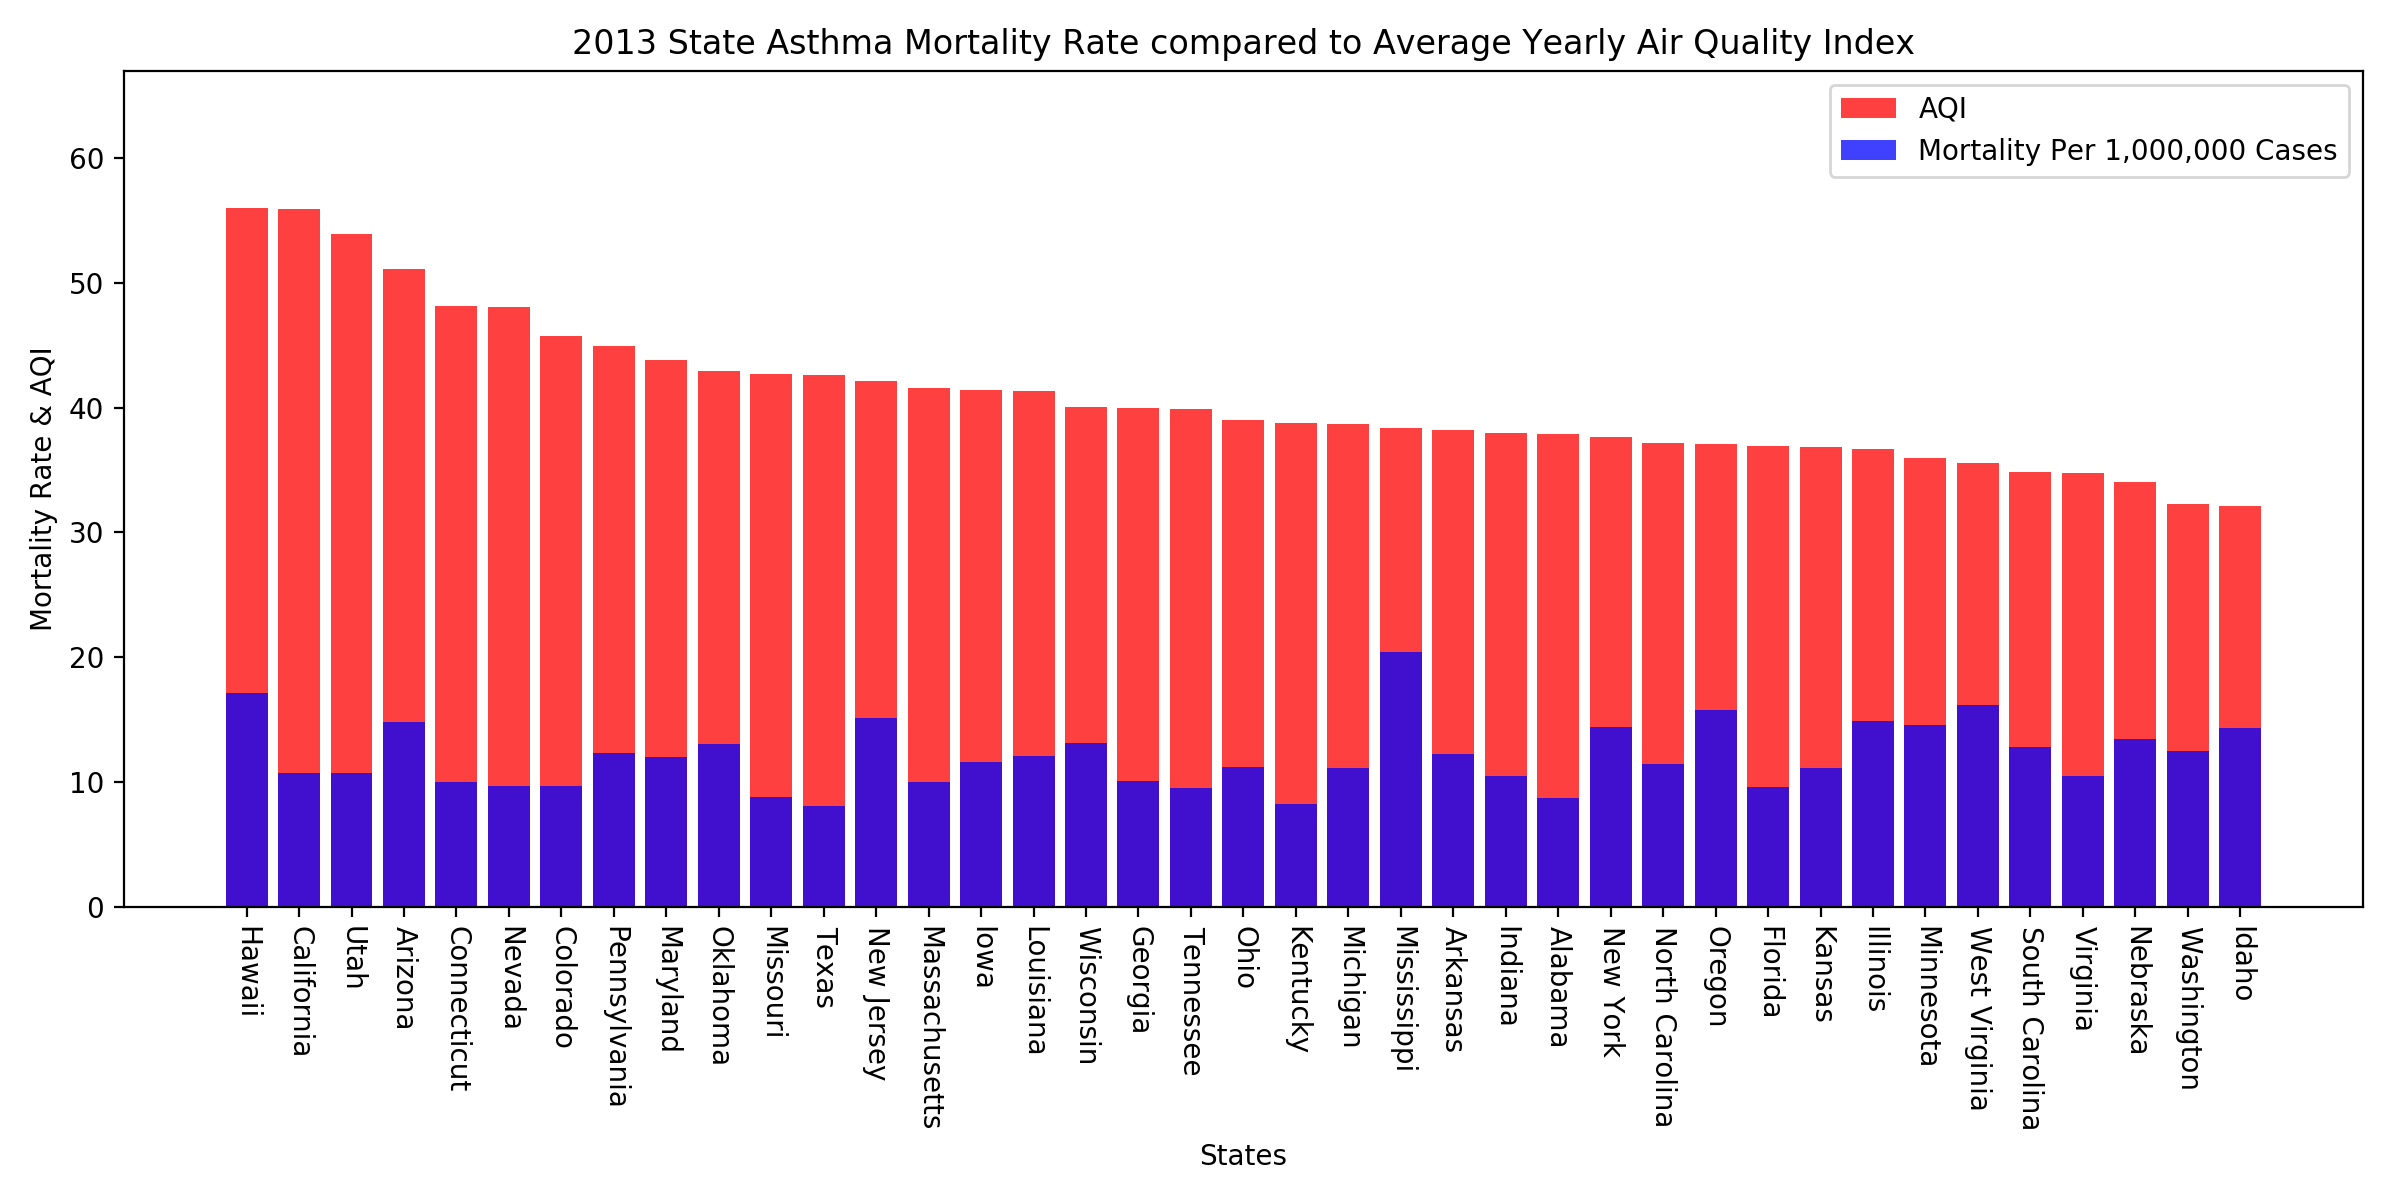

In [45]:
plt.figure(2013,figsize=(12,6))
plt.bar(merge_2013['State'], merge_2013['2013 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_2013['State'], merge_2013['2013 Mortality'], color='b', alpha=0.75, align="center", label="Mortality Per 1,000,000 Cases")
plt.title("2013 State Asthma Mortality Rate compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,67)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("2013 Plot.png")

<IPython.core.display.Javascript object>


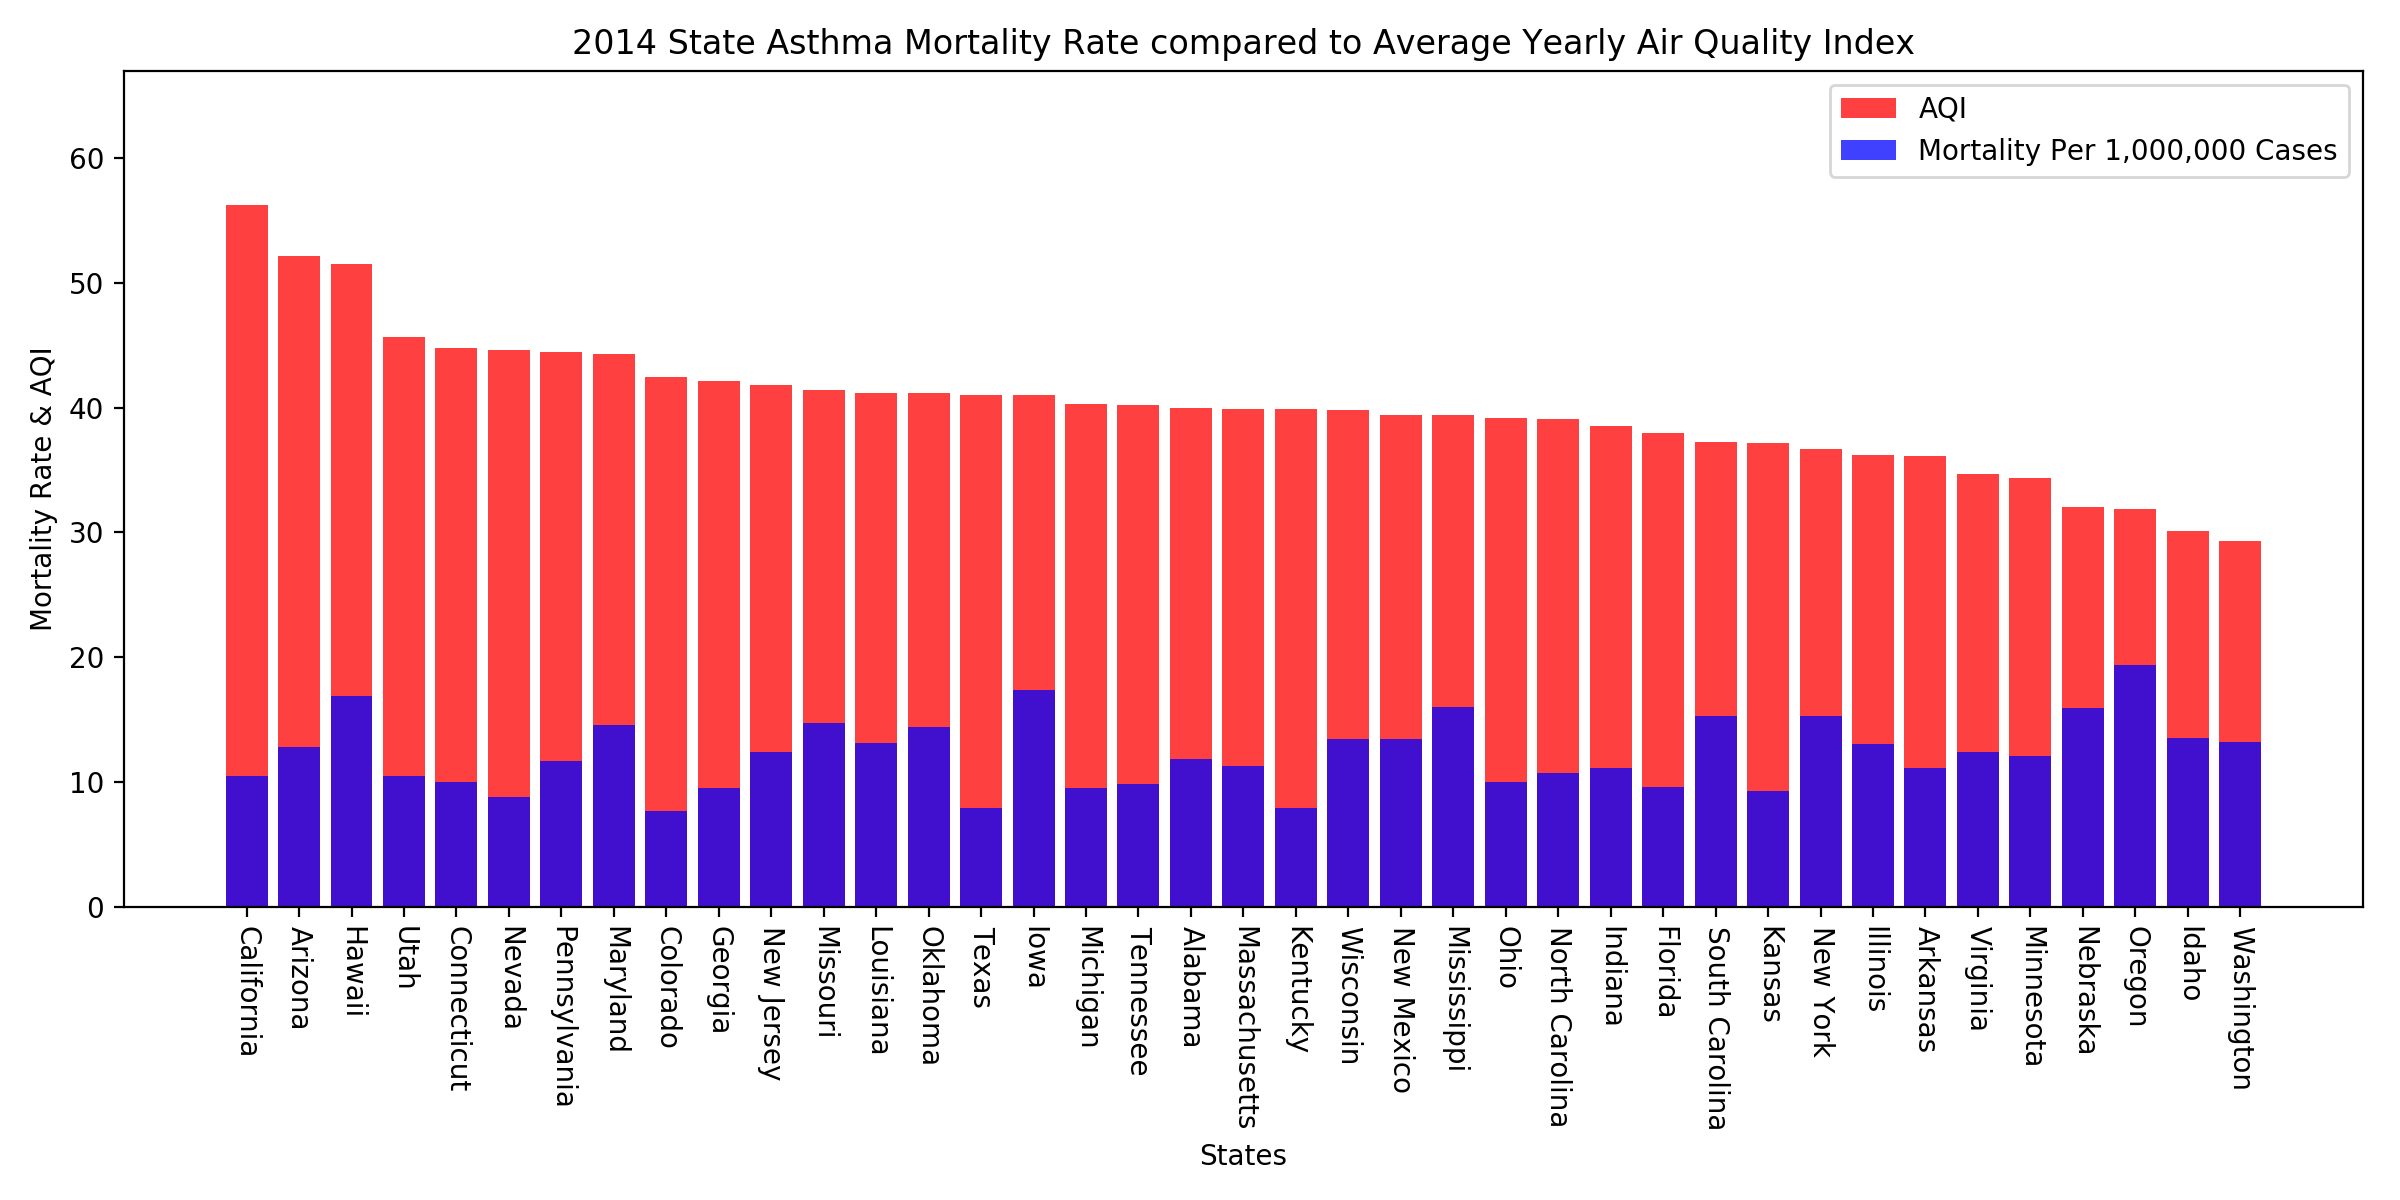

In [46]:
plt.figure(2014,figsize=(12,6))
plt.bar(merge_2014['State'], merge_2014['2014 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_2014['State'], merge_2014['2014 Mortality'], color='b', alpha=0.75, align="center", label="Mortality Per 1,000,000 Cases")
plt.title("2014 State Asthma Mortality Rate compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,67)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("2014 Plot.png")

<IPython.core.display.Javascript object>


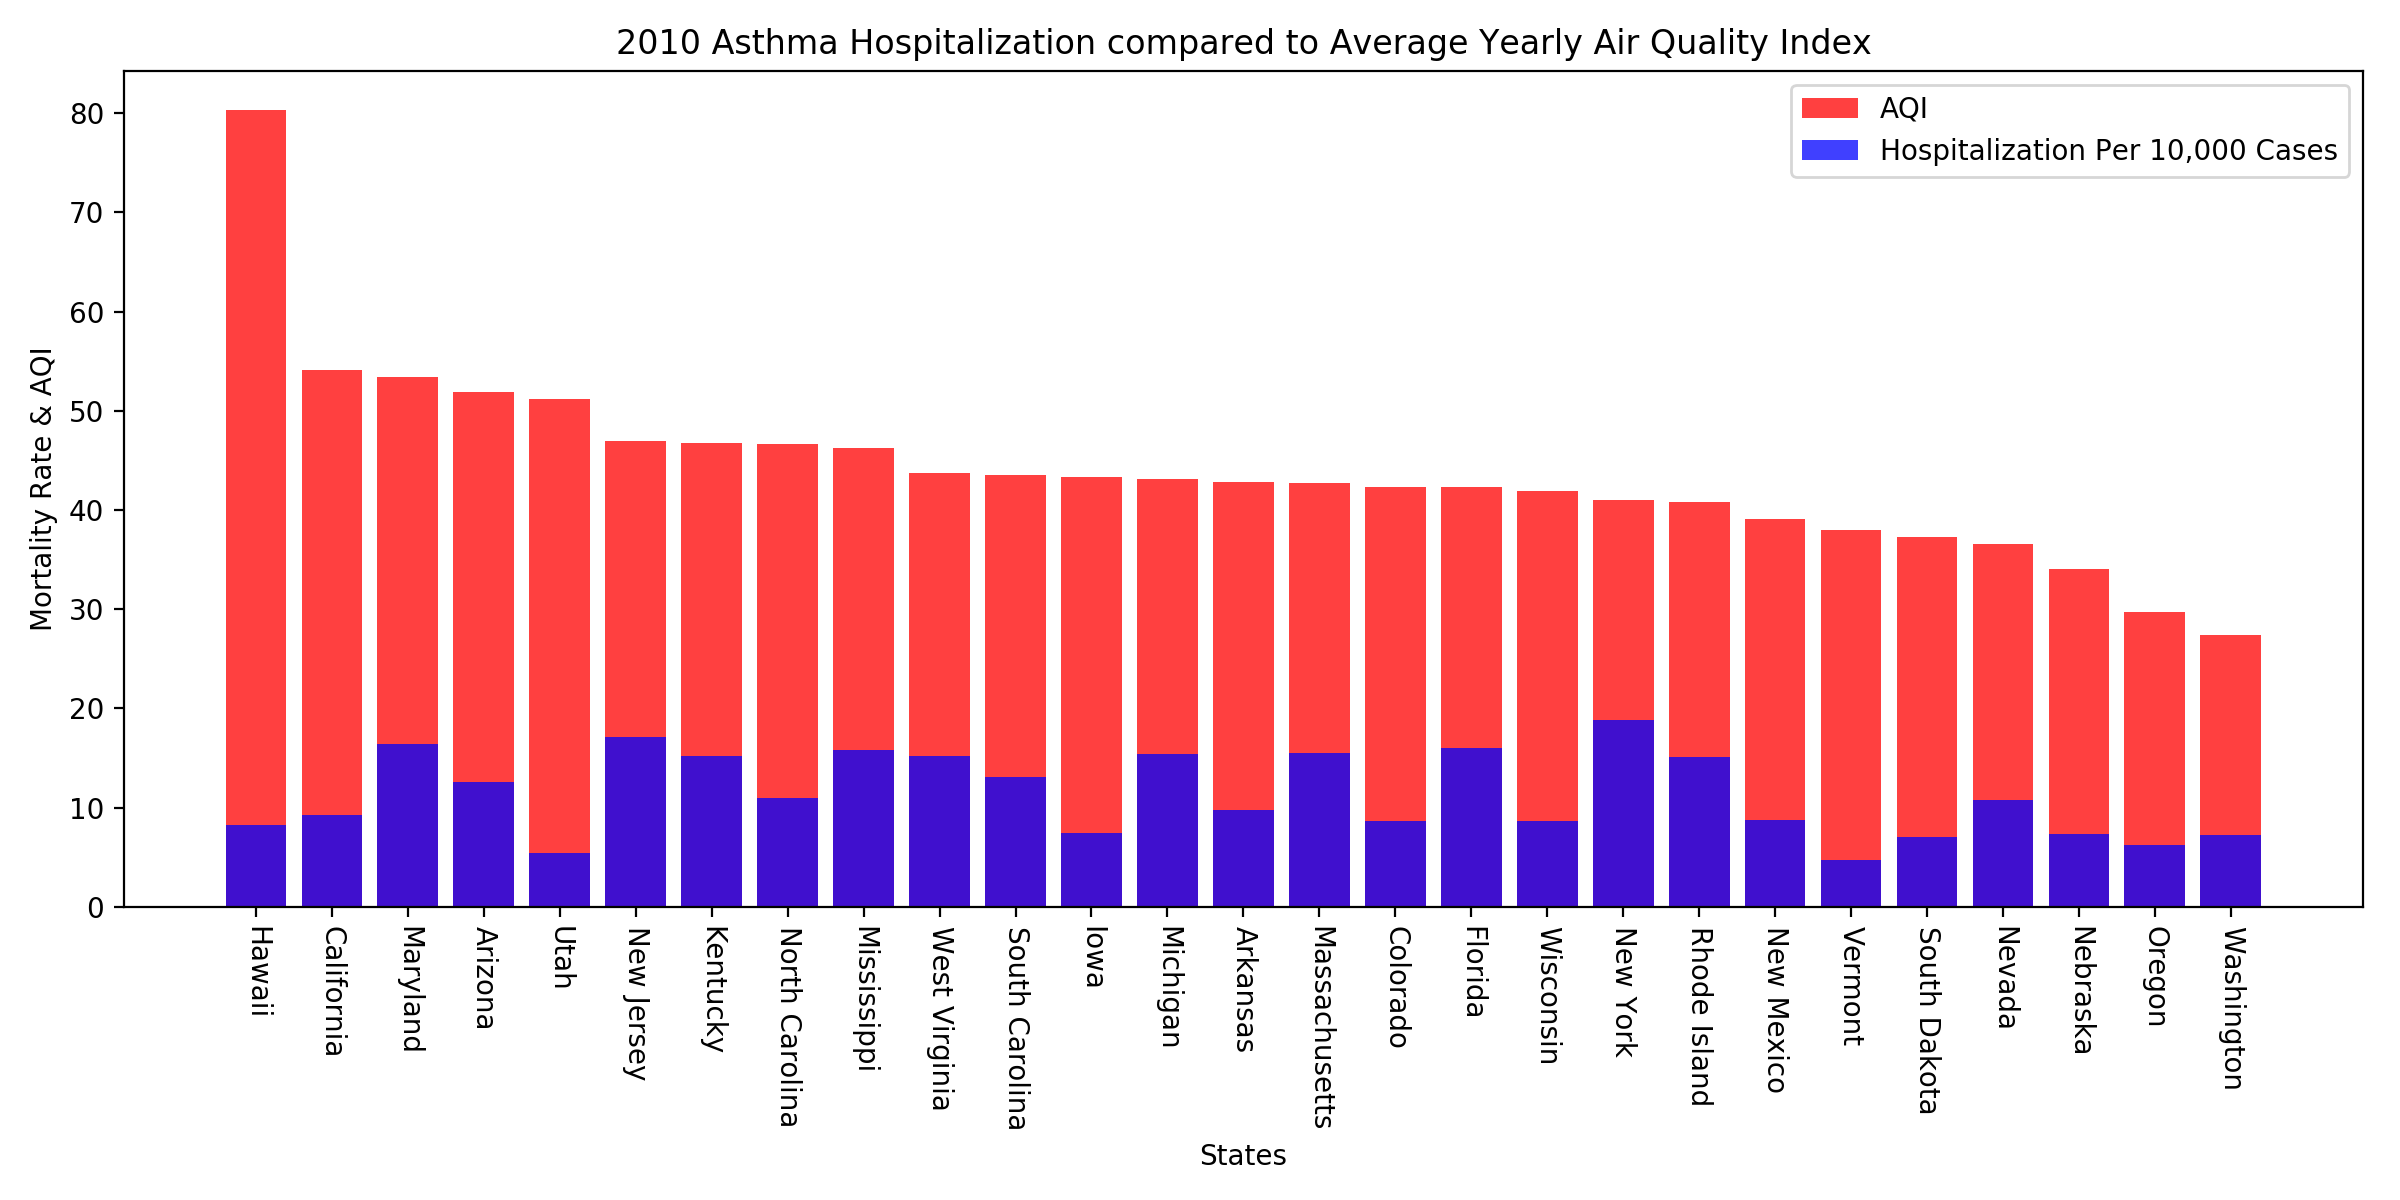

In [47]:
plt.figure('H2010',figsize=(12,6))
plt.bar(merge_h_2010['State'], merge_h_2010['2010 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_h_2010['State'], merge_h_2010['2010 Hospitalization'], color='b', alpha=0.75, align="center", label="Hospitalization Per 10,000 Cases")
plt.title("2010 Asthma Hospitalization compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
#plt.ylim(0,60)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("Hosp 2010 Plot.png")

<IPython.core.display.Javascript object>


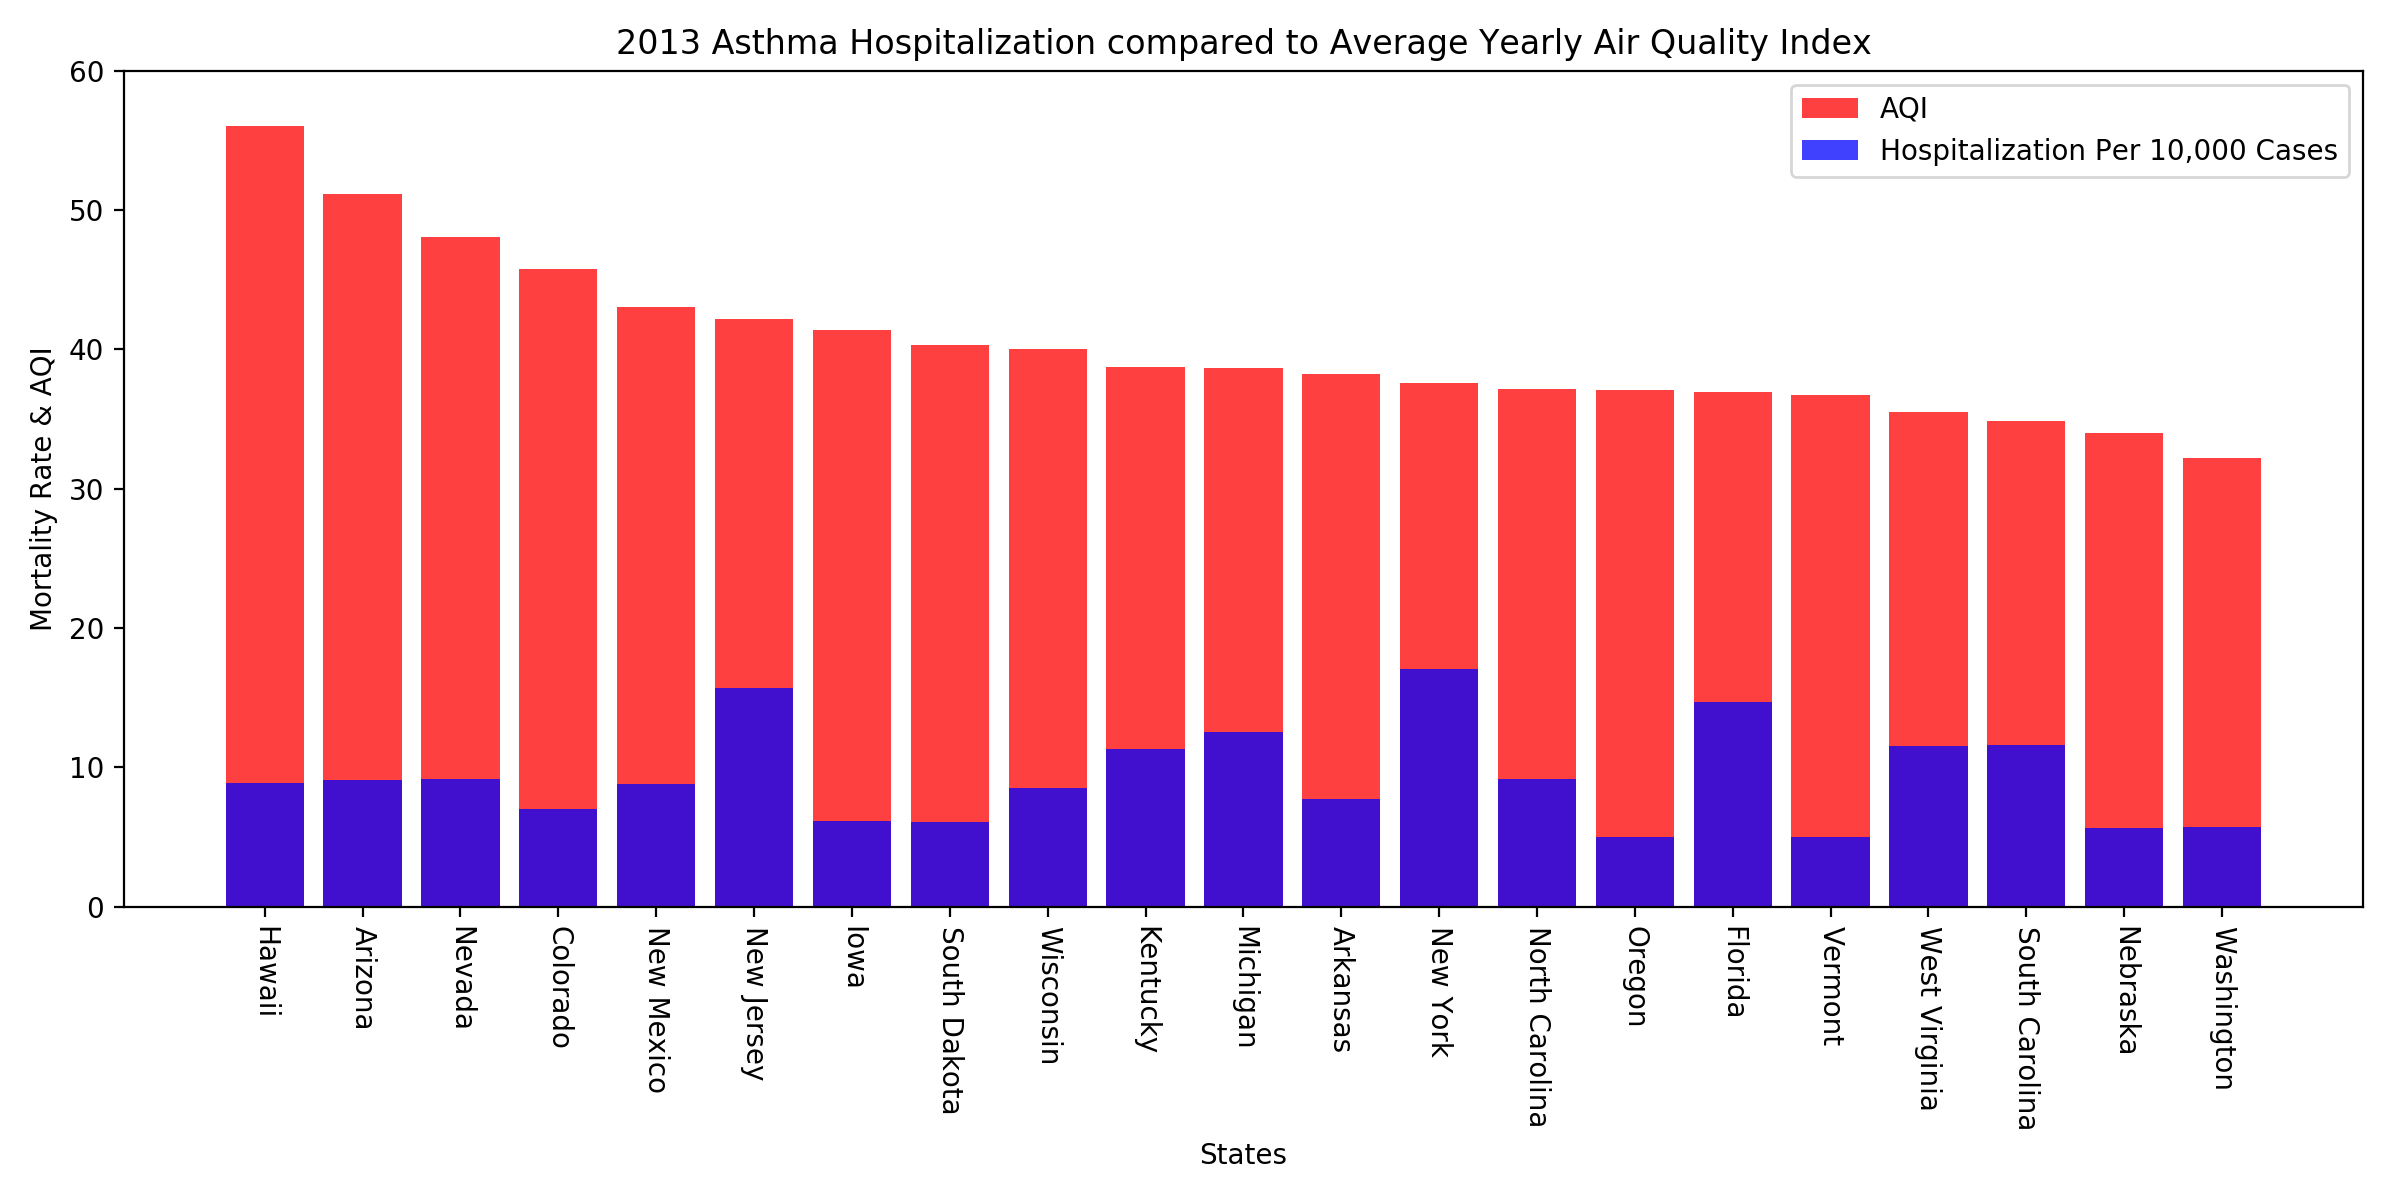

In [48]:
plt.figure('H2013',figsize=(12,6))
plt.bar(merge_h_2013['State'], merge_h_2013['2013 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_h_2013['State'], merge_h_2013['2013 Hospitalization'], color='b', alpha=0.75, align="center", label="Hospitalization Per 10,000 Cases")
plt.title("2013 Asthma Hospitalization compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,60)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("Hosp 2013 Plot.png")

<IPython.core.display.Javascript object>


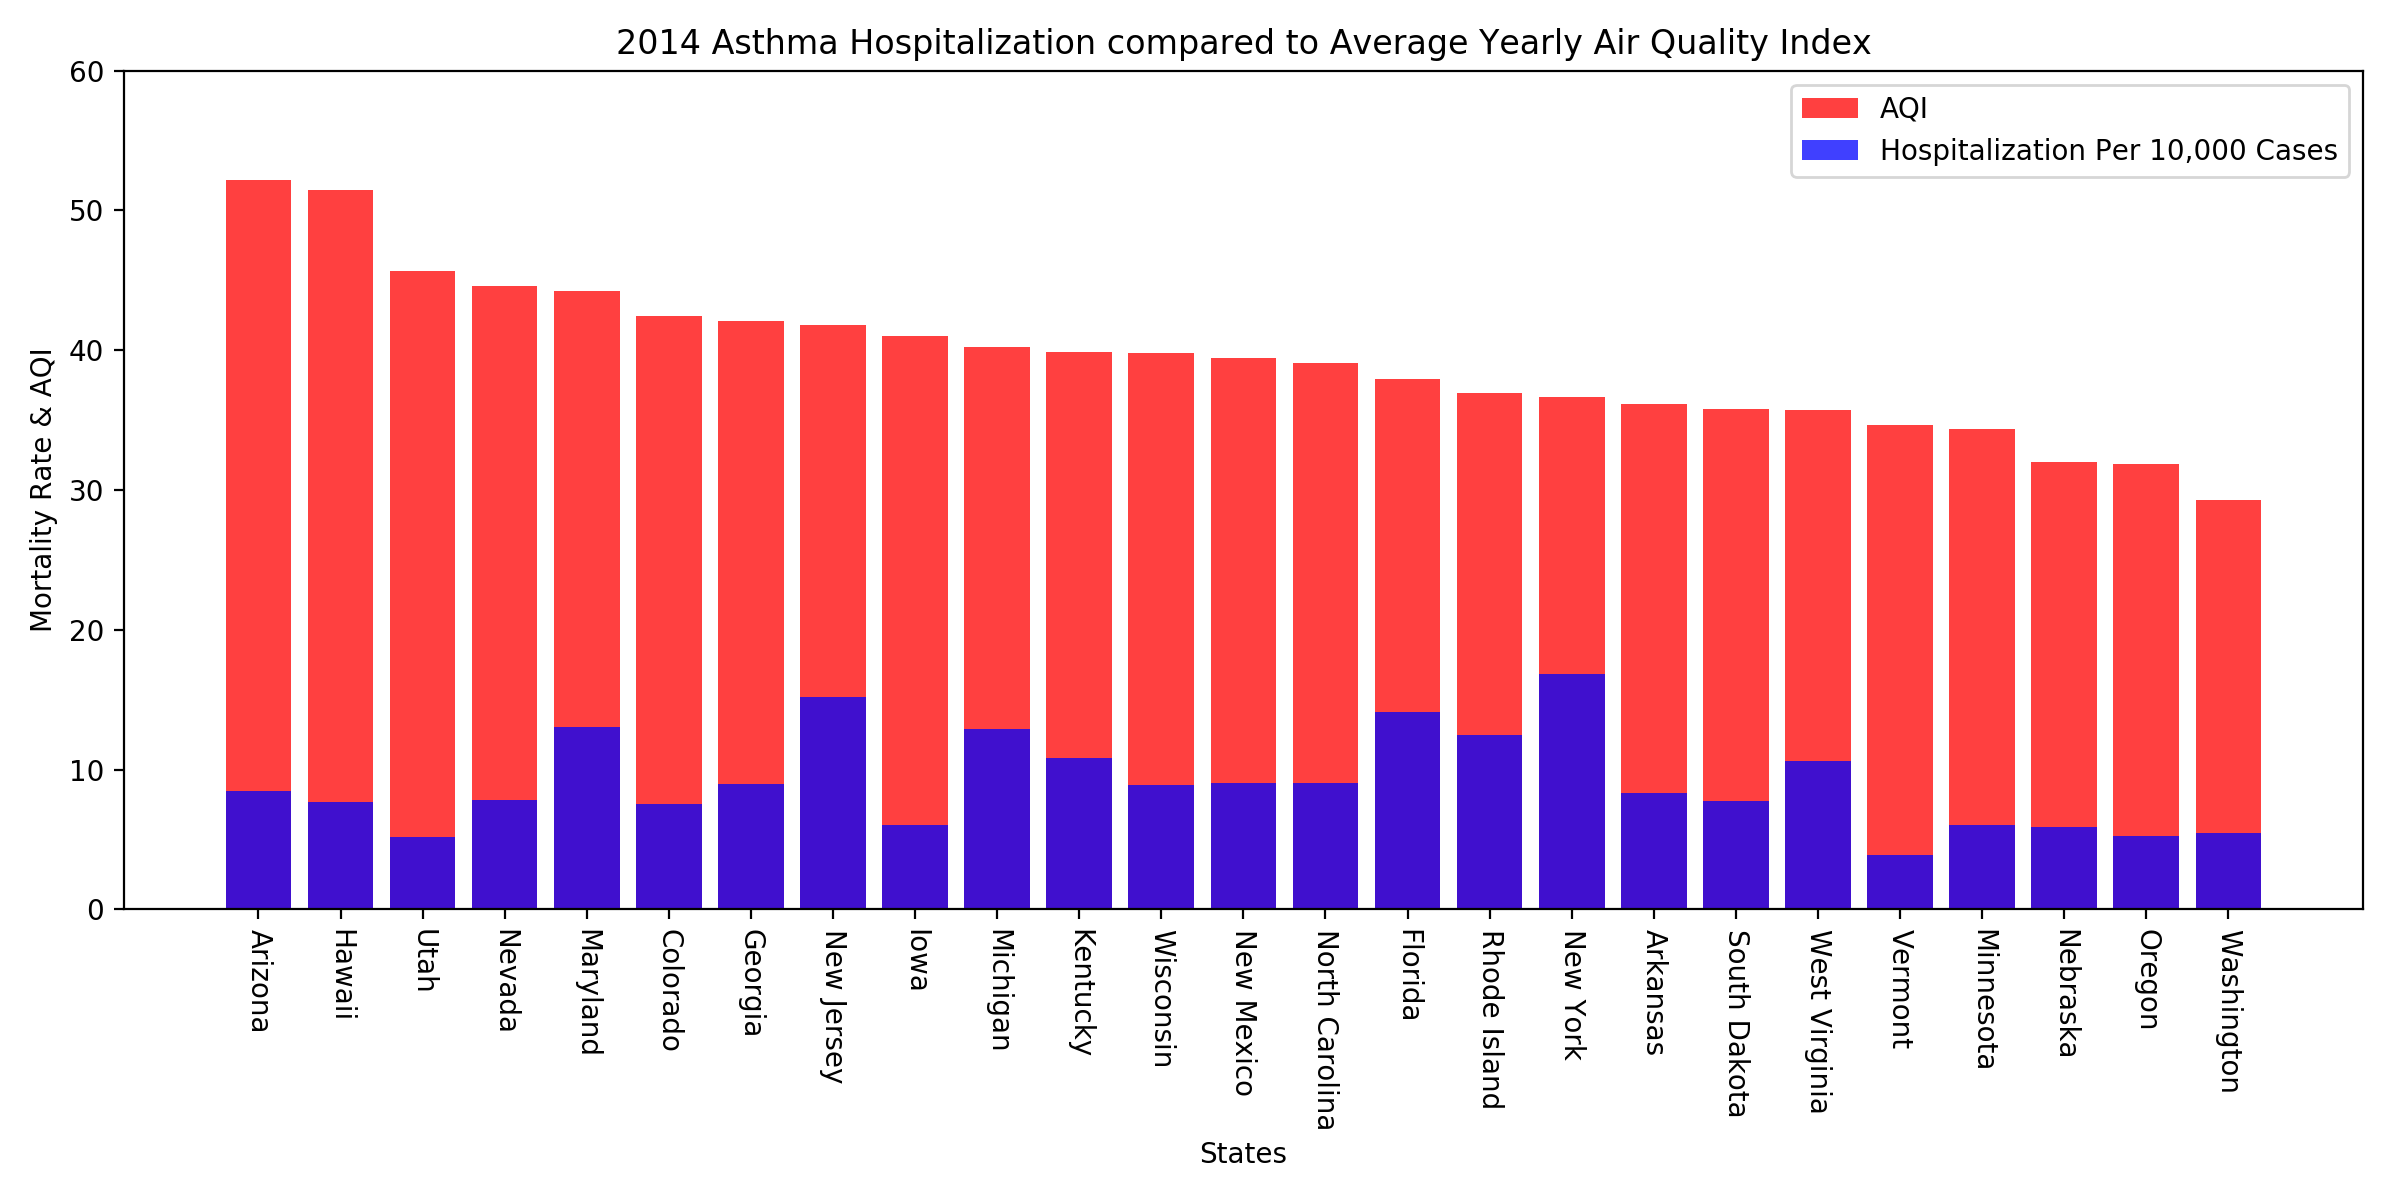

In [49]:
plt.figure('H2014',figsize=(12,6))
plt.bar(merge_h_2014['State'], merge_h_2014['2014 AQI'], color='r', alpha=0.75, align="center", label="AQI")
plt.bar(merge_h_2014['State'], merge_h_2014['2014 Hospitalization'], color='b', alpha=0.75, align="center", label="Hospitalization Per 10,000 Cases")
plt.title("2014 Asthma Hospitalization compared to Average Yearly Air Quality Index")
plt.xlabel("States")
plt.ylabel("Mortality Rate & AQI")
plt.ylim(0,60)
plt.xticks(rotation=270)
plt.legend()
# Save the figure
plt.tight_layout()
plt.show(aspect='auto')
plt.savefig("Hosp 2014 Plot.png")